In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [252]:
#loading train and test data
train_data=pd.read_excel("Data_Train.xlsx")
test_data=pd.read_excel("Test_set.xlsx")

In [253]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [254]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [255]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [256]:
#checking for null values
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [257]:
#droping null values as only one null value is there
train_data.dropna(axis=0,inplace=True)

In [258]:
#again checking for null value
train_data.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route              False
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops        False
Additional_Info    False
Price              False
dtype: bool

In [259]:
train_data.shape

(10682, 11)

In [260]:
#now let's check null value for test data
test_data.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route              False
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops        False
Additional_Info    False
dtype: bool

In [261]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [262]:
#converting Date of journey to datetime and extracting date and month of journey for both train and test data
train_data["Date_of_Journey"]=pd.to_datetime(train_data["Date_of_Journey"])
test_data["Date_of_Journey"]=pd.to_datetime(test_data["Date_of_Journey"])

In [263]:
#extracting day and date for train data
train_data["day"]=train_data["Date_of_Journey"].dt.day
train_data["month"]=train_data["Date_of_Journey"].dt.month
#extracting day and date for test data
test_data["day"]=test_data["Date_of_Journey"].dt.day
test_data["month"]=test_data["Date_of_Journey"].dt.month

In [264]:
#droping date of journey from both train and test set
train_data=train_data.drop("Date_of_Journey",axis=1)
test_data=test_data.drop("Date_of_Journey",axis=1)


In [265]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


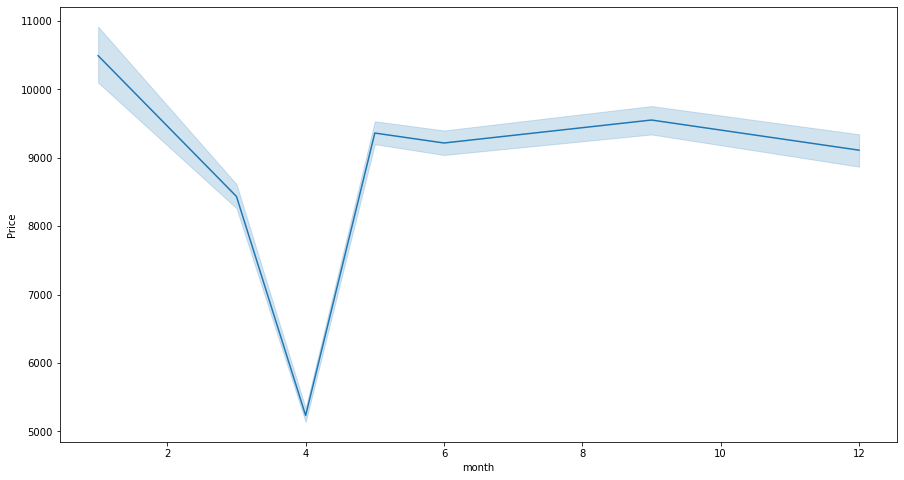

In [315]:
#plotting lineplot 
plt.figure(figsize=(15,8))
ax=sns.lineplot(x=train_data["month"],y=train_data["Price"])
plt.xlabel("month")
plt.ylabel("Price")


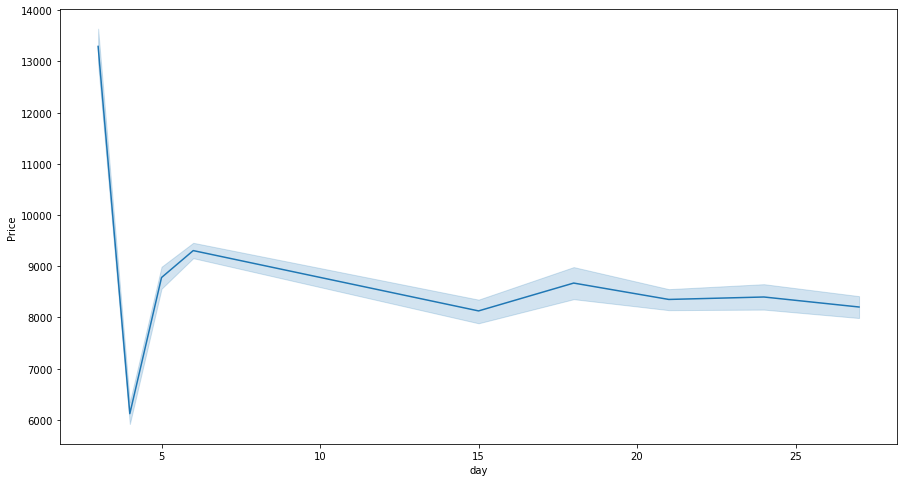

In [316]:
#plotting lineplot between day and Price
plt.figure(figsize=(15,8))
ax=sns.lineplot(x=train_data["day"],y=train_data["Price"])

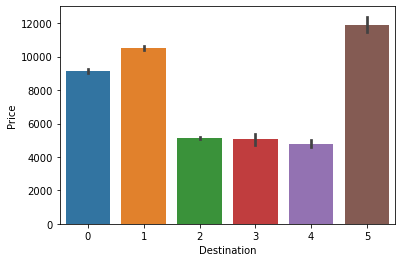

In [317]:
#plotting and destination and Price
sns.barplot(x=train_data["Destination"],y=train_data["Price"])

In [266]:
duration[1].split()

['4h', '0m']

In [267]:
#converting duration time into duration hour and minute column of training data
duration=list(train_data["Duration"])
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i] = '{} 0m'.format(duration[i].strip())
        elif 'm' in duration[i]:
            duration[i]='0h {}'.format(duration[i].strip())
dur_hours=[]
dur_min=[]

for i in range(len(duration)):
    dur_hours.append(duration[i].split()[0][:-1])
    dur_min.append(duration[i].split()[1][:-1])

train_data["duration_hours"]=dur_hours
train_data["duration_minute"]=dur_min

In [268]:
#converting duration time into duration hour and minute column of testing data
duration=list(test_data["Duration"])
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i] = '{} 0m'.format(duration[i].strip())
        elif 'm' in duration[i]:
            duration[i]='0h {}'.format(duration[i].strip())
dur_hours=[]
dur_min=[]

for i in range(len(duration)):
    dur_hours.append(duration[i].split()[0][:-1])
    dur_min.append(duration[i].split()[1][:-1])

test_data["duration_hours"]=dur_hours
test_data["duration_minute"]=dur_min

In [269]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,duration_hours,duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,4,45


In [270]:
test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,day,month,duration_hours,duration_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,2,50


In [271]:
#converting Departure time to hour and minute for train and test data
train_data["Dep_Time_hour"]=pd.to_datetime(train_data["Dep_Time"]).dt.hour
train_data["Dep_Time_minute"]=pd.to_datetime(train_data["Dep_Time"]).dt.minute

test_data["Dep_Time_hour"]=pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_Time_minute"]=pd.to_datetime(test_data["Dep_Time"]).dt.minute

train_data.drop("Dep_Time",axis=1,inplace=True)
test_data.drop("Dep_Time",axis=1,inplace=True)



In [272]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,duration_hours,duration_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2,50,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,7,25,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,19,0,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,5,25,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,4,45,16,50


In [273]:
test_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,day,month,duration_hours,duration_minute,Dep_Time_hour,Dep_Time_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,10,55,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,5,12,4,0,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,23,45,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,13,0,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,2,50,23,55


In [274]:
# converting arrival time to minute and hour arrival time
train_data["Arrival_Time_hour"]=pd.to_datetime(train_data["Arrival_Time"]).dt.hour
train_data["Arrival_Time_minute"]=pd.to_datetime(train_data["Arrival_Time"]).dt.minute

test_data["Arrival_Time_hour"]=pd.to_datetime(test_data["Arrival_Time"]).dt.hour
test_data["Arrival_Time_minute"]=pd.to_datetime(test_data["Arrival_Time"]).dt.minute
# dropping Arrival time from both train and test data
train_data.drop("Arrival_Time",axis=1,inplace=True)
test_data.drop("Arrival_Time",axis=1,inplace=True)


In [275]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,duration_hours,duration_minute,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,4,45,16,50,21,35


In [276]:
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,day,month,duration_hours,duration_minute,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,10,55,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,5,12,4,0,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,23,45,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,13,0,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,2,50,23,55,2,45


In [277]:
#dropping duration column from train and test
train_data.drop("Duration",axis=1,inplace=True)
test_data.drop("Duration",axis=1,inplace=True)

In [278]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day,month,duration_hours,duration_minute,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,4,45,16,50,21,35


In [279]:
test_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,day,month,duration_hours,duration_minute,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,10,55,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,5,12,4,0,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,23,45,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,13,0,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,2,50,23,55,2,45


In [281]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  object
 1   Source               10682 non-null  object
 2   Destination          10682 non-null  object
 3   Route                10682 non-null  object
 4   Total_Stops          10682 non-null  object
 5   Additional_Info      10682 non-null  object
 6   Price                10682 non-null  int64 
 7   day                  10682 non-null  int64 
 8   month                10682 non-null  int64 
 9   duration_hours       10682 non-null  object
 10  duration_minute      10682 non-null  object
 11  Dep_Time_hour        10682 non-null  int64 
 12  Dep_Time_minute      10682 non-null  int64 
 13  Arrival_Time_hour    10682 non-null  int64 
 14  Arrival_Time_minute  10682 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 1.3+ MB


In [282]:
#converting object datatype to integer type
train_data["duration_hours"]=train_data["duration_hours"].astype("int64")
train_data["duration_minute"]=train_data["duration_minute"].astype("int64")
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  object
 1   Source               10682 non-null  object
 2   Destination          10682 non-null  object
 3   Route                10682 non-null  object
 4   Total_Stops          10682 non-null  object
 5   Additional_Info      10682 non-null  object
 6   Price                10682 non-null  int64 
 7   day                  10682 non-null  int64 
 8   month                10682 non-null  int64 
 9   duration_hours       10682 non-null  int64 
 10  duration_minute      10682 non-null  int64 
 11  Dep_Time_hour        10682 non-null  int64 
 12  Dep_Time_minute      10682 non-null  int64 
 13  Arrival_Time_hour    10682 non-null  int64 
 14  Arrival_Time_minute  10682 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 1.3+ MB


In [283]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              2671 non-null   object
 1   Source               2671 non-null   object
 2   Destination          2671 non-null   object
 3   Route                2671 non-null   object
 4   Total_Stops          2671 non-null   object
 5   Additional_Info      2671 non-null   object
 6   day                  2671 non-null   int64 
 7   month                2671 non-null   int64 
 8   duration_hours       2671 non-null   object
 9   duration_minute      2671 non-null   object
 10  Dep_Time_hour        2671 non-null   int64 
 11  Dep_Time_minute      2671 non-null   int64 
 12  Arrival_Time_hour    2671 non-null   int64 
 13  Arrival_Time_minute  2671 non-null   int64 
dtypes: int64(6), object(8)
memory usage: 292.3+ KB


In [284]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
l2=LabelEncoder()

In [299]:
#fitting label encoder to train data
train_data["Airline"]=l1.fit_transform(train_data["Airline"])
train_data["Source"]=l1.fit_transform(train_data["Source"])
train_data["Destination"]=l1.fit_transform(train_data["Destination"])
train_data["Route"]=l1.fit_transform(train_data["Route"])
train_data["Total_Stops"]=l1.fit_transform(train_data["Total_Stops"])
train_data["Additional_Info"]=l1.fit_transform(train_data["Additional_Info"])

In [300]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day,month,duration_hours,duration_minute,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,3,0,5,18,4,8,3897,24,3,2,50,22,20,1,10
1,1,3,0,84,1,8,7662,5,1,7,25,5,50,13,15
2,4,2,1,118,1,8,13882,6,9,19,0,9,25,4,25
3,3,3,0,91,0,8,6218,5,12,5,25,18,5,23,30
4,3,0,5,29,0,8,13302,3,1,4,45,16,50,21,35


In [301]:
# fitting label encoder to test data
test_data["Airline"]=l1.fit_transform(test_data["Airline"])
test_data["Source"]=l1.fit_transform(test_data["Source"])
test_data["Destination"]=l1.fit_transform(test_data["Destination"])
test_data["Route"]=l1.fit_transform(test_data["Route"])
test_data["Total_Stops"]=l1.fit_transform(test_data["Total_Stops"])
test_data["Additional_Info"]=l1.fit_transform(test_data["Additional_Info"])

In [325]:
dur=(train_data["duration_hours"]*60)+train_data["duration_minute"]

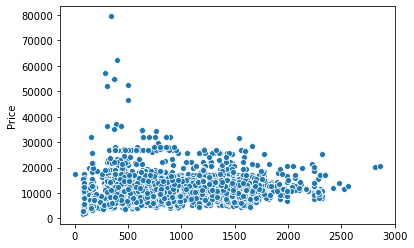

In [326]:
#scatter plot between duration and price
sns.scatterplot(x=dur,y=train_data["Price"])

In [302]:
#applying standard scaler to train_data
from sklearn.preprocessing import StandardScaler
X_train=train_data.drop("Price",axis=1)
Y_train=train_data["Price"]

In [303]:
X_test=test_data

In [304]:
#fit transform to data
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [311]:
Y_train=np.array(Y_train)
Y_train = Y_train.reshape((len(Y_train), 1)) 
Y_train = sc.fit_transform(Y_train)
Y_train = Y_train.ravel()
Y_train

array([-1.12553455, -0.30906781,  1.03978296, ..., -0.40296691,
        0.77218138,  0.57809433])

In [312]:
Y_train

array([-1.12553455, -0.30906781,  1.03978296, ..., -0.40296691,
        0.77218138,  0.57809433])

In [6]:
train_data["Date_of_Journey"]=pd.to_datetime(train_data["Date_of_Journey"])

In [13]:
train_data["Date_of_Journey"].dt.

0        2019-03-24
1        2019-01-05
2        2019-09-06
3        2019-12-05
4        2019-01-03
            ...    
10678    2019-09-04
10679    2019-04-27
10680    2019-04-27
10681    2019-01-03
10682    2019-09-05
Name: Date_of_Journey, Length: 10683, dtype: object

In [14]:
train_data.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

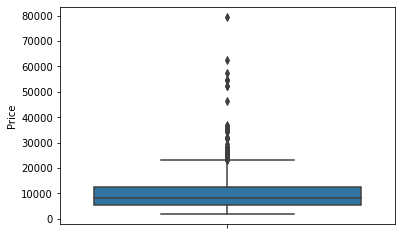

In [35]:
sns.boxplot(y=train_data.Price)

Text(0.5, 1.0, 'Airline VS Price')

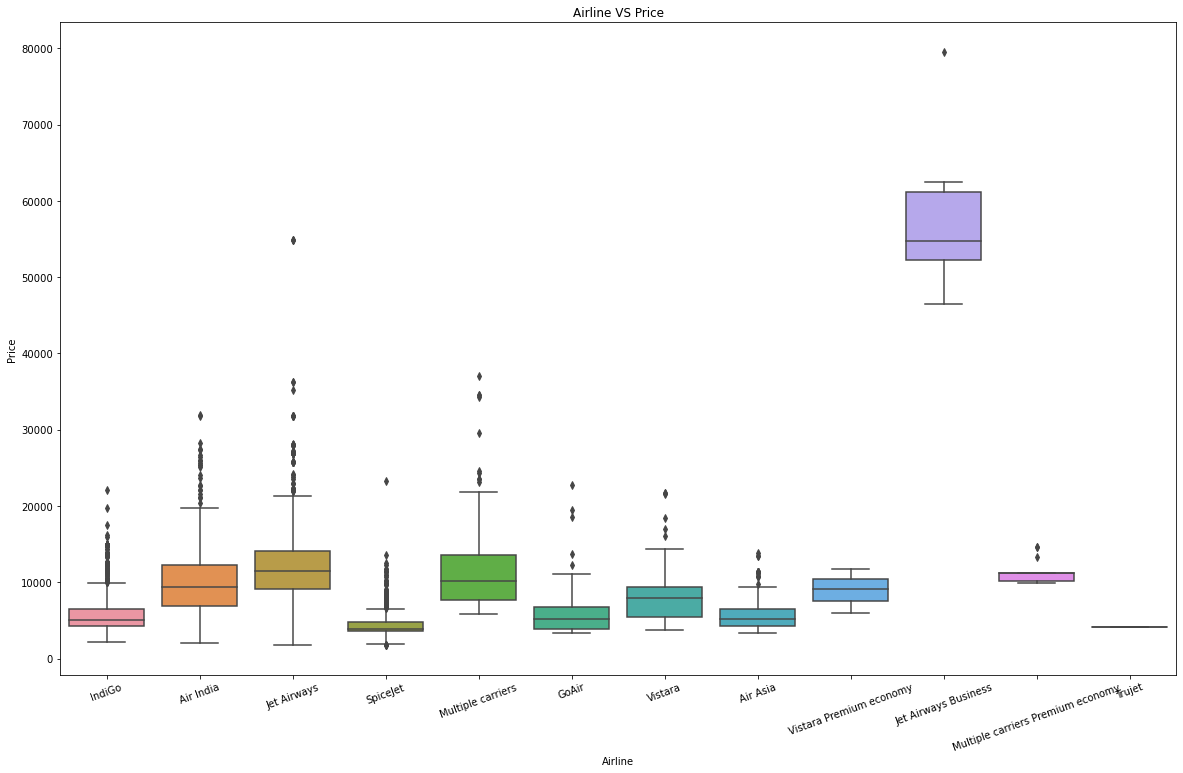

In [41]:
#box plot airline
plt.figure(figsize=(20,12))
sns.boxplot(x=train_data.Airline,y=train_data.Price)
plt.xticks(rotation=20)
plt.title("Airline VS Price")

In [51]:
sorted_price=train_data["Airline"].groupby(train_data.Price).sum().sort_values(ascending=False)

In [61]:
sorted_price=pd.DataFrame(sorted_price)
sorted_price

,Airline
Price,
4668,VistaraVistaraVistaraVistaraVistaraVistaraVist...
4878,VistaraVistaraVistaraVistaraVistaraVistaraVist...
5403,VistaraVistaraVistaraVistaraVistaraVistaraVist...
8452,VistaraVistaraVistaraVistaraVistaraVistaraVist...
8610,VistaraVistaraVistaraVistaraVistaraVistaraVist...
...,...
6135,Air Asia
6477,Air Asia
6181,Air Asia


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

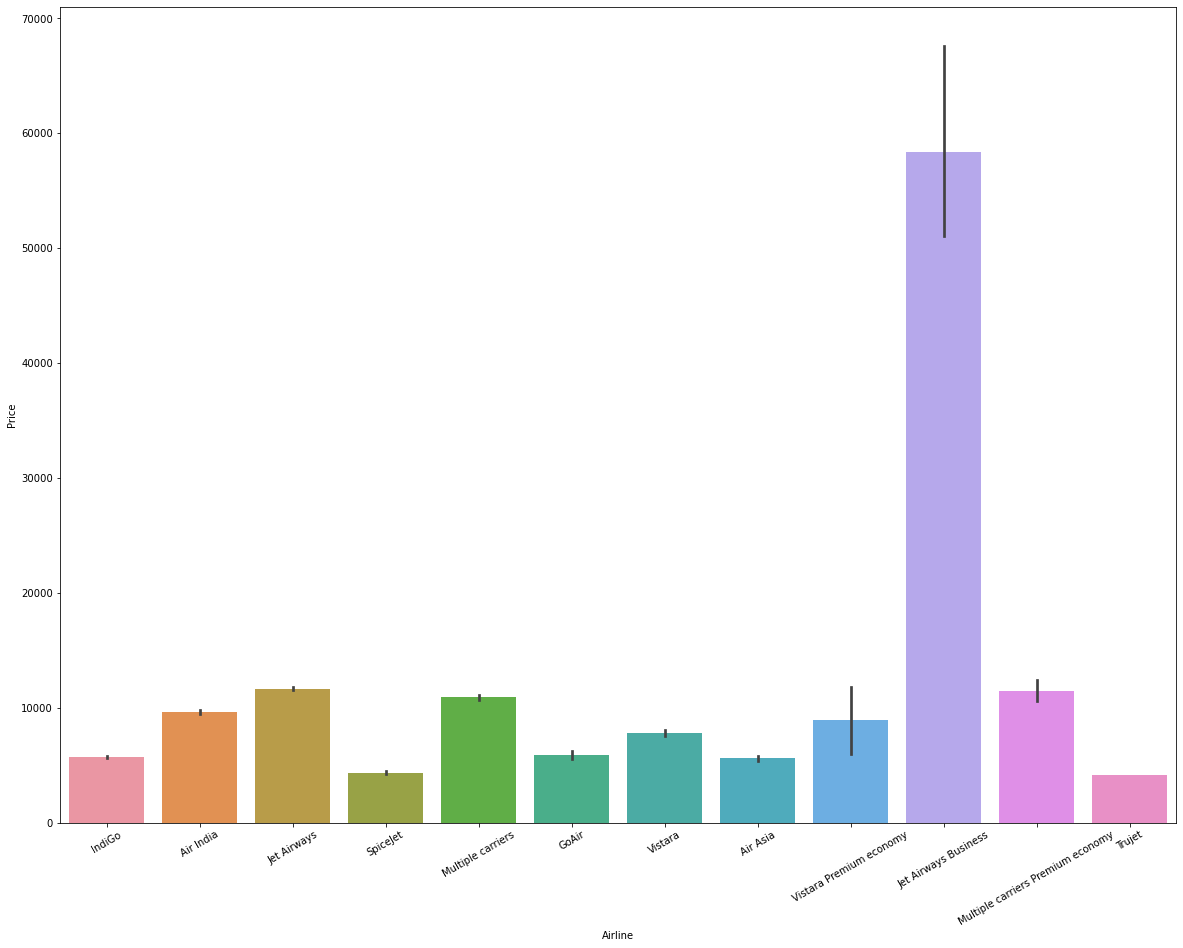

In [63]:
plt.figure(figsize=(20,15))
sns.barplot(x=train_data.Airline,y=train_data.Price)
plt.xticks(rotation=30)

In [65]:
train_data.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [66]:
train_data.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [67]:
test_data.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route              False
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops        False
Additional_Info    False
dtype: bool

In [68]:
train_data.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route               True
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops         True
Additional_Info    False
Price              False
dtype: bool